In [1]:
### Staging and creation area for Connor's info ###

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from config import api_key

In [3]:
from census import Census
from us import states

In [4]:
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels
# https://api.census.gov/data/2018/acs/acs5/variables.html more labels

In [5]:
# Census API calls for 2012
c = Census(api_key, year=2012)
raw_data = c.acs5.get(('NAME', 'B01001_001E',
'B01001_003E',
'B01001_004E',
'B01001_005E',
'B01001_006E',
'B01001_007E',
'B01001_008E',
'B01001_009E',
'B01001_010E',
'B01001_011E',
'B01001_012E',
'B01001_013E',
'B01001_014E',
'B01001_015E',
'B01001_016E',
'B01001_017E',
'B01001_018E',
'B01001_019E',
'B01001_020E',
'B01001_021E',
'B01001_022E',
'B01001_023E',
'B01001_024E',
'B01001_025E',
'B01001_027E',
'B01001_028E',
'B01001_029E',
'B01001_030E',
'B01001_031E',
'B01001_032E',
'B01001_033E',
'B01001_034E',
'B01001_035E',
'B01001_036E',
'B01001_037E',
'B01001_038E',
'B01001_039E',
'B01001_040E',
'B01001_041E',
'B01001_042E',
'B01001_043E',
'B01001_044E',
'B01001_045E',
'B01001_046E',
'B01001_047E',
'B01001_048E',
'B01001_049E'), {'for': 'state:*'})
census_df_raw = pd.DataFrame(raw_data)

census_df_raw = census_df_raw.rename(columns = {'state': 'State#',
                          'NAME': 'State',
'B01001_001E': "Total State Population",
'B01001_003E':'Males Under 5 years',
'B01001_004E':'Males 5 to 9 years',
'B01001_005E':'Males 10 to 14 years',
'B01001_006E':'Males 15 to 17 years',
'B01001_007E':'Males 18 and 19 years',
'B01001_008E':'Males 20 years',
'B01001_009E':'Males 21 years',
'B01001_010E':'Males 22 to 24 years',
'B01001_011E':'Males 25 to 29 years',
'B01001_012E':'Males 30 to 34 years',
'B01001_013E':'Males 35 to 39 years',
'B01001_014E':'Males 40 to 44 years',
'B01001_015E':'Males 45 to 49 years',
'B01001_016E':'Males 50 to 54 years',
'B01001_017E':'Males 55 to 59 years',
'B01001_018E':'Males 60 and 61 years',
'B01001_019E':'Males 62 to 64 years',
'B01001_020E':'Males 65 and 66 years',
'B01001_021E':'Males 67 to 69 years',
'B01001_022E':'Males 70 to 74 years',
'B01001_023E':'Males 75 to 79 years',
'B01001_024E':'Males 80 to 84 years',
'B01001_025E':'Males 85 years and over',
'B01001_027E':'Females Under 5 years',
'B01001_028E':'Females 5 to 9 years',
'B01001_029E':'Females 10 to 14 years',
'B01001_030E':'Females 15 to 17 years',
'B01001_031E':'Females 18 and 19 years',
'B01001_032E':'Females 20 years',
'B01001_033E':'Females 21 years',
'B01001_034E':'Females 22 to 24 years',
'B01001_035E':'Females 25 to 29 years',
'B01001_036E':'Females 30 to 34 years',
'B01001_037E':'Females 35 to 39 years',
'B01001_038E':'Females 40 to 44 years',
'B01001_039E':'Females 45 to 49 years',
'B01001_040E':'Females 50 to 54 years',
'B01001_041E':'Females 55 to 59 years',
'B01001_042E':'Females 60 and 61 years',
'B01001_043E':'Females 62 to 64 years',
'B01001_044E':'Females 65 and 66 years',
'B01001_045E':'Females 67 to 69 years',
'B01001_046E':'Females 70 to 74 years',
'B01001_047E':'Females 75 to 79 years',
'B01001_048E':'Females 80 to 84 years',
'B01001_049E':'Females 85 years and over'
})
census_df_raw = census_df_raw.sort_values('State#').reset_index(drop=True)

census_df_raw.head()

,State,Total State Population,Males Under 5 years,Males 5 to 9 years,Males 10 to 14 years,Males 15 to 17 years,Males 18 and 19 years,Males 20 years,Males 21 years,Males 22 to 24 years,...,Females 55 to 59 years,Females 60 and 61 years,Females 62 to 64 years,Females 65 and 66 years,Females 67 to 69 years,Females 70 to 74 years,Females 75 to 79 years,Females 80 to 84 years,Females 85 years and over,State#
0,Alabama,4777326.0,155901.0,157239.0,163024.0,101478.0,71202.0,37747.0,36316.0,95906.0,...,161752.0,63328.0,82593.0,49077.0,64475.0,89062.0,71910.0,53976.0,53758.0,01
1,Alaska,711139.0,27900.0,25610.0,26565.0,16383.0,11069.0,6541.0,6609.0,17764.0,...,23956.0,7680.0,8973.0,4603.0,5282.0,7299.0,4731.0,3682.0,2898.0,02
2,Arizona,6410979.0,232450.0,226788.0,232415.0,138931.0,96527.0,49891.0,48040.0,136152.0,...,196748.0,78462.0,106413.0,63655.0,87015.0,115176.0,87678.0,67644.0,65704.0,04
3,Arkansas,2916372.0,100520.0,101399.0,100461.0,60862.0,43533.0,22008.0,22030.0,57601.0,...,95204.0,36170.0,51222.0,29355.0,39790.0,56534.0,43565.0,34647.0,34419.0,05
4,California,37325068.0,1300557.0,1278085.0,1319653.0,851857.0,585628.0,309104.0,300772.0,845258.0,...,1138645.0,413020.0,542516.0,314521.0,391396.0,535219.0,428347.0,363724.0,394787.0,06


In [6]:
# Combining some columns
census_df_raw['Males under 18 years'] = census_df_raw['Males Under 5 years'] + census_df_raw['Males 5 to 9 years'] + census_df_raw['Males 10 to 14 years'] + census_df_raw['Males 15 to 17 years']
census_df_raw['Females under 18 years'] = census_df_raw['Females Under 5 years'] + census_df_raw['Females 5 to 9 years'] + census_df_raw['Females 10 to 14 years'] + census_df_raw['Females 15 to 17 years']
census_df_raw['Males 20 to 24'] = census_df_raw['Males 20 years'] + census_df_raw['Males 21 years'] + census_df_raw['Males 22 to 24 years']
census_df_raw['Females 20 to 24'] = census_df_raw['Females 20 years'] + census_df_raw['Females 21 years'] + census_df_raw['Females 22 to 24 years']
census_df_raw['Males Over 65 years'] = census_df_raw['Males 65 and 66 years'] + census_df_raw['Males 67 to 69 years'] + census_df_raw['Males 70 to 74 years'] + census_df_raw['Males 75 to 79 years'] + census_df_raw['Males 80 to 84 years'] + census_df_raw['Males 85 years and over']
census_df_raw['Females Over 65 years'] = census_df_raw['Females 65 and 66 years'] + census_df_raw['Females 67 to 69 years'] + census_df_raw['Females 70 to 74 years'] + census_df_raw['Females 75 to 79 years'] + census_df_raw['Females 80 to 84 years'] + census_df_raw['Females 85 years and over']
census_df_raw.head()

,State,Total State Population,Males Under 5 years,Males 5 to 9 years,Males 10 to 14 years,Males 15 to 17 years,Males 18 and 19 years,Males 20 years,Males 21 years,Males 22 to 24 years,...,Females 75 to 79 years,Females 80 to 84 years,Females 85 years and over,State#,Males under 18 years,Females under 18 years,Males 20 to 24,Females 20 to 24,Males Over 65 years,Females Over 65 years
0,Alabama,4777326.0,155901.0,157239.0,163024.0,101478.0,71202.0,37747.0,36316.0,95906.0,...,71910.0,53976.0,53758.0,01,577642.0,552587.0,169969.0,170839.0,281047.0,382258.0
1,Alaska,711139.0,27900.0,25610.0,26565.0,16383.0,11069.0,6541.0,6609.0,17764.0,...,4731.0,3682.0,2898.0,02,96458.0,90168.0,30914.0,25588.0,27277.0,28495.0
2,Arizona,6410979.0,232450.0,226788.0,232415.0,138931.0,96527.0,49891.0,48040.0,136152.0,...,87678.0,67644.0,65704.0,04,830584.0,794067.0,234083.0,216793.0,407638.0,486872.0
3,Arkansas,2916372.0,100520.0,101399.0,100461.0,60862.0,43533.0,22008.0,22030.0,57601.0,...,43565.0,34647.0,34419.0,05,363242.0,346142.0,101639.0,99510.0,183873.0,238310.0
4,California,37325068.0,1300557.0,1278085.0,1319653.0,851857.0,585628.0,309104.0,300772.0,845258.0,...,428347.0,363724.0,394787.0,06,4750152.0,4532654.0,1455134.0,1339054.0,1872512.0,2427994.0


In [37]:
# Reorder 2012
cleaned_2012_df = census_df_raw[[
'State',
'State#',
'Total State Population',
'Males under 18 years',
'Males 18 and 19 years',
'Males 20 to 24',
'Males 25 to 29 years',
'Males 30 to 34 years',
'Males 35 to 39 years',
'Males 40 to 44 years',
'Males 45 to 49 years',
'Males 50 to 54 years',
'Males 55 to 59 years',
'Males 60 and 61 years',
'Males 62 to 64 years',
'Males Over 65 years',
'Females under 18 years',
'Females 18 and 19 years',
'Females 20 to 24',
'Females 25 to 29 years',
'Females 30 to 34 years',
'Females 35 to 39 years',
'Females 40 to 44 years',
'Females 45 to 49 years',
'Females 50 to 54 years',
'Females 55 to 59 years',
'Females 60 and 61 years',
'Females 62 to 64 years',
'Females Over 65 years']]
cleaned_2012_df.head()



,State,State#,Total State Population,Males under 18 years,Males 18 and 19 years,Males 20 to 24,Males 25 to 29 years,Males 30 to 34 years,Males 35 to 39 years,Males 40 to 44 years,...,Females 25 to 29 years,Females 30 to 34 years,Females 35 to 39 years,Females 40 to 44 years,Females 45 to 49 years,Females 50 to 54 years,Females 55 to 59 years,Females 60 and 61 years,Females 62 to 64 years,Females Over 65 years
0,Alabama,01,4777326.0,577642.0,71202.0,169969.0,152809.0,146288.0,146600.0,156367.0,...,156907.0,151793.0,156714.0,159431.0,174767.0,178174.0,161752.0,63328.0,82593.0,382258.0
1,Alaska,02,711139.0,96458.0,11069.0,30914.0,28740.0,24771.0,22650.0,25801.0,...,26068.0,22956.0,22109.0,23003.0,25683.0,26934.0,23956.0,7680.0,8973.0,28495.0
2,Arizona,04,6410979.0,830584.0,96527.0,234083.0,227908.0,213799.0,207899.0,210248.0,...,217022.0,205095.0,202743.0,205494.0,211629.0,212745.0,196748.0,78462.0,106413.0,486872.0
3,Arkansas,05,2916372.0,363242.0,43533.0,101639.0,96027.0,92044.0,89488.0,94177.0,...,96409.0,91051.0,91619.0,93458.0,102930.0,101828.0,95204.0,36170.0,51222.0,238310.0
4,California,06,37325068.0,4750152.0,585628.0,1455134.0,1416892.0,1314799.0,1295028.0,1318867.0,...,1338002.0,1273666.0,1280460.0,1305560.0,1334498.0,1292850.0,1138645.0,413020.0,542516.0,2427994.0


In [8]:
total_young_males = cleaned_2012_df["Males 18 and 19 years"] + cleaned_2012_df["Males 20 to 24"] + cleaned_2012_df["Males 25 to 29 years"]
total_young_females = cleaned_2012_df["Females 18 and 19 years"] + cleaned_2012_df["Females 20 to 24"] + cleaned_2012_df["Females 25 to 29 years"]
percent_males = total_young_males/cleaned_2012_df["Total State Population"]
percent_females = total_young_females/cleaned_2012_df["Total State Population"]
new_2012_df = pd.DataFrame({"State": cleaned_2012_df["State"],
                            "Total Males 18 to 29":total_young_males,
                            "Total Females 18 to 29":total_young_females,
                            "Total People 18 to 29":total_young_males+total_young_females,
                            "Percent Males": percent_males*100,
                            "Percent Females": percent_females*100,
                            "Percent 18 to 29": (percent_males + percent_females)*100
})


new_2012_df.head()


,State,Total Males 18 to 29,Total Females 18 to 29,Total People 18 to 29,Percent Males,Percent Females,Percent 18 to 29
0,Alabama,393980.0,396409.0,790389.0,8.246873,8.297717,16.544590
1,Alaska,70723.0,61055.0,131778.0,9.945032,8.585523,18.530555
2,Arizona,558518.0,522785.0,1081303.0,8.711899,8.154527,16.866426
3,Arkansas,241199.0,237186.0,478385.0,8.270516,8.132913,16.403429
4,California,3457654.0,3222185.0,6679839.0,9.263624,8.632764,17.896388


In [9]:
# Census API calls for 2016
c = Census(api_key, year=2016)
raw_data_2016 = c.acs5.get(('NAME', 'B01001_001E',
'B01001_003E',
'B01001_004E',
'B01001_005E',
'B01001_006E',
'B01001_007E',
'B01001_008E',
'B01001_009E',
'B01001_010E',
'B01001_011E',
'B01001_012E',
'B01001_013E',
'B01001_014E',
'B01001_015E',
'B01001_016E',
'B01001_017E',
'B01001_018E',
'B01001_019E',
'B01001_020E',
'B01001_021E',
'B01001_022E',
'B01001_023E',
'B01001_024E',
'B01001_025E',
'B01001_027E',
'B01001_028E',
'B01001_029E',
'B01001_030E',
'B01001_031E',
'B01001_032E',
'B01001_033E',
'B01001_034E',
'B01001_035E',
'B01001_036E',
'B01001_037E',
'B01001_038E',
'B01001_039E',
'B01001_040E',
'B01001_041E',
'B01001_042E',
'B01001_043E',
'B01001_044E',
'B01001_045E',
'B01001_046E',
'B01001_047E',
'B01001_048E',
'B01001_049E'), {'for': 'state:*'})
raw_data_2016 = pd.DataFrame(raw_data_2016)

raw_data_2016 = raw_data_2016.rename(columns = {'state': 'State#',
                          'NAME': 'State', 
'B01001_001E': "Total State Population",
'B01001_003E':'Males Under 5 years',
'B01001_004E':'Males 5 to 9 years',
'B01001_005E':'Males 10 to 14 years',
'B01001_006E':'Males 15 to 17 years',
'B01001_007E':'Males 18 and 19 years',
'B01001_008E':'Males 20 years',
'B01001_009E':'Males 21 years',
'B01001_010E':'Males 22 to 24 years',
'B01001_011E':'Males 25 to 29 years',
'B01001_012E':'Males 30 to 34 years',
'B01001_013E':'Males 35 to 39 years',
'B01001_014E':'Males 40 to 44 years',
'B01001_015E':'Males 45 to 49 years',
'B01001_016E':'Males 50 to 54 years',
'B01001_017E':'Males 55 to 59 years',
'B01001_018E':'Males 60 and 61 years',
'B01001_019E':'Males 62 to 64 years',
'B01001_020E':'Males 65 and 66 years',
'B01001_021E':'Males 67 to 69 years',
'B01001_022E':'Males 70 to 74 years',
'B01001_023E':'Males 75 to 79 years',
'B01001_024E':'Males 80 to 84 years',
'B01001_025E':'Males 85 years and over',
'B01001_027E':'Females Under 5 years',
'B01001_028E':'Females 5 to 9 years',
'B01001_029E':'Females 10 to 14 years',
'B01001_030E':'Females 15 to 17 years',
'B01001_031E':'Females 18 and 19 years',
'B01001_032E':'Females 20 years',
'B01001_033E':'Females 21 years',
'B01001_034E':'Females 22 to 24 years',
'B01001_035E':'Females 25 to 29 years',
'B01001_036E':'Females 30 to 34 years',
'B01001_037E':'Females 35 to 39 years',
'B01001_038E':'Females 40 to 44 years',
'B01001_039E':'Females 45 to 49 years',
'B01001_040E':'Females 50 to 54 years',
'B01001_041E':'Females 55 to 59 years',
'B01001_042E':'Females 60 and 61 years',
'B01001_043E':'Females 62 to 64 years',
'B01001_044E':'Females 65 and 66 years',
'B01001_045E':'Females 67 to 69 years',
'B01001_046E':'Females 70 to 74 years',
'B01001_047E':'Females 75 to 79 years',
'B01001_048E':'Females 80 to 84 years',
'B01001_049E':'Females 85 years and over'
})
raw_data_2016 = raw_data_2016.sort_values('State#').reset_index(drop=True)

raw_data_2016.head()

,State,Total State Population,Males Under 5 years,Males 5 to 9 years,Males 10 to 14 years,Males 15 to 17 years,Males 18 and 19 years,Males 20 years,Males 21 years,Males 22 to 24 years,...,Females 55 to 59 years,Females 60 and 61 years,Females 62 to 64 years,Females 65 and 66 years,Females 67 to 69 years,Females 70 to 74 years,Females 75 to 79 years,Females 80 to 84 years,Females 85 years and over,State#
0,Alabama,4841164,148910.0,156423.0,159647.0,98334.0,67790.0,37110.0,36861.0,97495.0,...,172841.0,65434.0,91124.0,58864.0,75198.0,100123.0,76173.0,55764.0,55840.0,01
1,Alaska,736855,27905.0,26436.0,26748.0,15441.0,10841.0,6454.0,6537.0,20685.0,...,25494.0,9350.0,10411.0,5974.0,7566.0,9041.0,4957.0,3701.0,3872.0,02
2,Arizona,6728577,222187.0,233694.0,230981.0,139485.0,95817.0,52489.0,52008.0,146215.0,...,212313.0,83813.0,121512.0,80605.0,104283.0,143438.0,102397.0,71555.0,75848.0,04
3,Arkansas,2968472,97806.0,103608.0,99276.0,60841.0,41841.0,22574.0,22531.0,59657.0,...,100763.0,37363.0,54230.0,35078.0,45231.0,62998.0,44963.0,34675.0,36391.0,05
4,California,38654206,1277459.0,1295679.0,1295400.0,800330.0,548548.0,309098.0,306053.0,883164.0,...,1238979.0,462083.0,623185.0,389084.0,490069.0,630402.0,468253.0,364898.0,437219.0,06


In [10]:
# Combining some columns
raw_data_2016['Males under 18 years'] = raw_data_2016['Males Under 5 years'] + raw_data_2016['Males 5 to 9 years'] + raw_data_2016['Males 10 to 14 years'] + raw_data_2016['Males 15 to 17 years']
raw_data_2016['Females under 18 years'] = raw_data_2016['Females Under 5 years'] + raw_data_2016['Females 5 to 9 years'] + raw_data_2016['Females 10 to 14 years'] + raw_data_2016['Females 15 to 17 years']
raw_data_2016['Males 20 to 24'] = raw_data_2016['Males 20 years'] + raw_data_2016['Males 21 years'] + raw_data_2016['Males 22 to 24 years']
raw_data_2016['Females 20 to 24'] = raw_data_2016['Females 20 years'] + raw_data_2016['Females 21 years'] + raw_data_2016['Females 22 to 24 years']
raw_data_2016['Males Over 65 years'] = raw_data_2016['Males 65 and 66 years'] + raw_data_2016['Males 67 to 69 years'] + raw_data_2016['Males 70 to 74 years'] + raw_data_2016['Males 75 to 79 years'] + raw_data_2016['Males 80 to 84 years'] + raw_data_2016['Males 85 years and over']
raw_data_2016['Females Over 65 years'] = raw_data_2016['Females 65 and 66 years'] + raw_data_2016['Females 67 to 69 years'] + raw_data_2016['Females 70 to 74 years'] + raw_data_2016['Females 75 to 79 years'] + raw_data_2016['Females 80 to 84 years'] + raw_data_2016['Females 85 years and over']
raw_data_2016.head()


,State,Total State Population,Males Under 5 years,Males 5 to 9 years,Males 10 to 14 years,Males 15 to 17 years,Males 18 and 19 years,Males 20 years,Males 21 years,Males 22 to 24 years,...,Females 75 to 79 years,Females 80 to 84 years,Females 85 years and over,State#,Males under 18 years,Females under 18 years,Males 20 to 24,Females 20 to 24,Males Over 65 years,Females Over 65 years
0,Alabama,4841164,148910.0,156423.0,159647.0,98334.0,67790.0,37110.0,36861.0,97495.0,...,76173.0,55764.0,55840.0,01,563314.0,541875.0,171466.0,171023.0,320432.0,421962.0
1,Alaska,736855,27905.0,26436.0,26748.0,15441.0,10841.0,6454.0,6537.0,20685.0,...,4957.0,3701.0,3872.0,02,96530.0,91086.0,33676.0,25813.0,34194.0,35111.0
2,Arizona,6728577,222187.0,233694.0,230981.0,139485.0,95817.0,52489.0,52008.0,146215.0,...,102397.0,71555.0,75848.0,04,826347.0,793271.0,250712.0,232412.0,492025.0,578126.0
3,Arkansas,2968472,97806.0,103608.0,99276.0,60841.0,41841.0,22574.0,22531.0,59657.0,...,44963.0,34675.0,36391.0,05,361531.0,345703.0,104762.0,100757.0,205651.0,259336.0
4,California,38654206,1277459.0,1295679.0,1295400.0,800330.0,548548.0,309098.0,306053.0,883164.0,...,468253.0,364898.0,437219.0,06,4668868.0,4471415.0,1498315.0,1392705.0,2197057.0,2779925.0


In [11]:
# Reorder 2016
cleaned_2016_df = raw_data_2016[[
'State',
'State#',
'Total State Population',
'Males under 18 years',
'Males 18 and 19 years',
'Males 20 to 24',
'Males 25 to 29 years',
'Males 30 to 34 years',
'Males 35 to 39 years',
'Males 40 to 44 years',
'Males 45 to 49 years',
'Males 50 to 54 years',
'Males 55 to 59 years',
'Males 60 and 61 years',
'Males 62 to 64 years',
'Males Over 65 years',
'Females under 18 years',
'Females 18 and 19 years',
'Females 20 to 24',
'Females 25 to 29 years',
'Females 30 to 34 years',
'Females 35 to 39 years',
'Females 40 to 44 years',
'Females 45 to 49 years',
'Females 50 to 54 years',
'Females 55 to 59 years',
'Females 60 and 61 years',
'Females 62 to 64 years',
'Females Over 65 years']]
cleaned_2016_df.head()




In [12]:
total_young_males_2016 = cleaned_2016_df["Males 18 and 19 years"] + cleaned_2016_df["Males 20 to 24"] + cleaned_2016_df["Males 25 to 29 years"]
total_young_females_2016 = cleaned_2016_df["Females 18 and 19 years"] + cleaned_2016_df["Females 20 to 24"] + cleaned_2016_df["Females 25 to 29 years"]
percent_males_2016 = total_young_males_2016/cleaned_2016_df["Total State Population"].astype('float')
percent_females_2016 = total_young_females_2016/cleaned_2016_df["Total State Population"].astype('float')
new_2016_df = pd.DataFrame({"State": cleaned_2016_df["State"],
                            "Total Males 18 to 29": total_young_males,
                            "Total Females 18 to 29": total_young_females,
                            "Total People 18 to 29": total_young_males_2016 + total_young_females_2016,
                            "Percent Males": percent_males_2016*100,
                            "Percent Females": percent_females_2016*100,
                            "Percent 18 to 29": (percent_males_2016 + percent_females_2016)*100
})




new_2016_df.head()


,State,Total Males 18 to 29,Total Females 18 to 29,Total People 18 to 29,Percent Males,Percent Females,Percent 18 to 29
0,Alabama,393980.0,396409.0,793744.0,8.194331,8.201395,16.395726
1,Alaska,70723.0,61055.0,139725.0,10.436382,8.525965,18.962347
2,Arizona,558518.0,522785.0,1125004.0,8.669575,8.050216,16.719791
3,Arkansas,241199.0,237186.0,481826.0,8.198022,8.033426,16.231448
4,California,3457654.0,3222185.0,6877946.0,9.190728,8.602797,17.793525


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

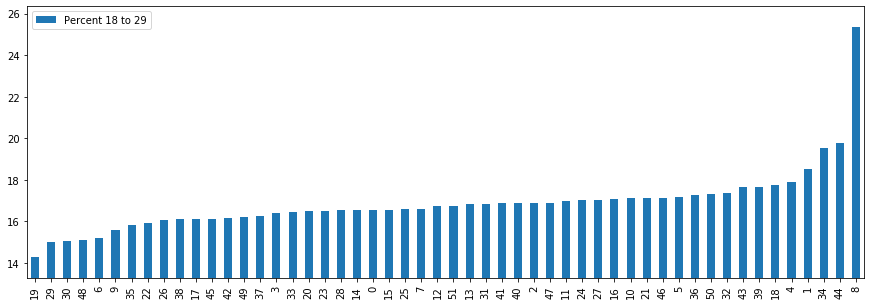

In [47]:
fig_2012 = new_2012_df["Percent 18 to 29"].sort_values().plot(kind='bar',figsize=(15,5), legend=True)
fig_2012.set_ylim(new_2012_df["Percent 18 to 29"].min()-1,new_2012_df["Percent 18 to 29"].max()+1)
#fig_2012.set_xticklabels(new_2012_df["State"])
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

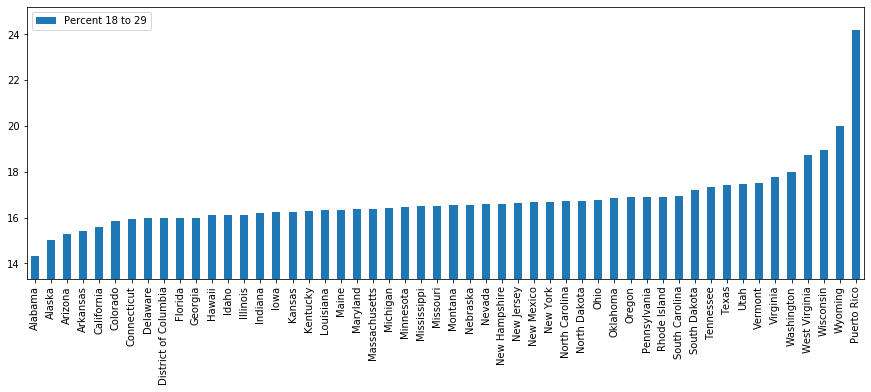

In [14]:
fig_2016 = new_2016_df["Percent 18 to 29"].sort_values().plot(kind='bar',figsize=(15,5), legend=True)
fig_2016.set_ylim(new_2016_df["Percent 18 to 29"].min()-1,new_2016_df["Percent 18 to 29"].max()+1)
fig_2016.set_xticklabels(new_2012_df["State"])
plt.tight_layout

In [15]:
file = "Resources/1976-2016-president.tab"
df = pd.read_csv(file,sep='\t',header=(0))
df = df.rename(columns = {'state':"State"})
df.head()

,year,State,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN
1,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN
2,1976,Alabama,AL,1,63,41,US President,"Maddox, Lester",american independent party,False,9198,1182850,20171015,NaN
3,1976,Alabama,AL,1,63,41,US President,"Bubar, Benjamin \\""Ben\""\""""",prohibition,False,6669,1182850,20171015,NaN
4,1976,Alabama,AL,1,63,41,US President,"Hall, Gus",communist party use,False,1954,1182850,20171015,NaN


In [16]:
party = df.groupby("party")
party = party["candidatevotes"].sum()
party = pd.DataFrame(party.sort_values(ascending=False))
party.head()

,candidatevotes
party,
republican,558286316
democrat,553813829
independent,28193567
libertarian,8947877
reform party,6915968


In [17]:
df_2016 = df.loc[df['year'] == 2016]
df_2012 = df.loc[df['year'] == 2012]

In [18]:
party_state_2016 = df_2016.groupby(["party", "State"])
party_state_2016.head()

,year,State,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
3395,2016,Alabama,AL,1,63,41,US President,"Trump, Donald J.",republican,False,1318255,2123372,20171015,NaN
3396,2016,Alabama,AL,1,63,41,US President,"Clinton, Hillary",democrat,False,729547,2123372,20171015,NaN
3397,2016,Alabama,AL,1,63,41,US President,"Johnson, Gary",libertarian,False,44467,2123372,20171015,NaN
3398,2016,Alabama,AL,1,63,41,US President,NaN,NaN,True,21712,2123372,20171015,NaN
3399,2016,Alabama,AL,1,63,41,US President,"Stein, Jill",green,False,9391,2123372,20171015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3732,2016,Wyoming,WY,56,83,68,US President,"Trump, Donald J.",republican,False,174419,258788,20171015,NaN
3733,2016,Wyoming,WY,56,83,68,US President,"Clinton, Hillary",democrat,False,55973,258788,20171015,NaN
3734,2016,Wyoming,WY,56,83,68,US President,"Johnson, Gary",libertarian,False,13287,258788,20171015,NaN
3736,2016,Wyoming,WY,56,83,68,US President,NaN,independent,False,3224,258788,20171015,NaN


In [23]:
#would consider conservative, republican, and liberal party democrat. need to combine. 
combined_dem_rep_2016 = df_2016.replace("conservative","republican")
combined_dem_rep_2016 = combined_dem_rep_2016.replace("liberal party", "democrat")
combined_dem_rep_2016 = combined_dem_rep_2016.replace("democratic-farmer-labor","democrat")
dems_2016 = combined_dem_rep_2016.loc[combined_dem_rep_2016["party"] == "democrat"]
repubs_2016 = combined_dem_rep_2016.loc[combined_dem_rep_2016["party"] == "republican"]
dems_repubs_2016 = dems_2016.append(repubs_2016)
state_count_2016 = dems_repubs_2016.groupby(["party", "State"])
state_count_2016 = pd.DataFrame(state_count_2016[["candidatevotes", "totalvotes"]].sum())
#state_count_2016

In [24]:
dem_votes_by_state_2016 = dems_2016[["State","candidatevotes","totalvotes"]]
dem_votes_by_state_2016 = dem_votes_by_state_2016.groupby("State")
dem_votes_by_state_2016 = dem_votes_by_state_2016.sum()
len(dem_votes_by_state_2016)

repubs_votes_by_state_2016 = repubs_2016[["State","candidatevotes","totalvotes"]]
repubs_votes_by_state_2016 = repubs_votes_by_state_2016.groupby("State")
repubs_votes_by_state_2016 = repubs_votes_by_state_2016.sum()
#repubs_votes_by_state

dems_merged_repubs_2016 = pd.merge(dem_votes_by_state_2016, repubs_votes_by_state_2016, on="State", how="outer")
dems_merged_repubs_2016 = dems_merged_repubs_2016.rename(columns = {"state": "State",
    "candidatevotes_x":"Democrat votes 2016",
                                                         "candidatevotes_y": "Republican votes 2016"})

dems_merged_repubs_2016 = dems_merged_repubs_2016[['Democrat votes 2016', 'Republican votes 2016']]
#dems_merged_repubs["Difference%ofTotal"] = (dems_merged_repubs["democrat votes"] - dems_merged_repubs["republican votes"])/(dems_merged_repubs["democrat votes"]+dems_merged_repubs["republican votes"])
#dems_merged_repubs = dems_merged_repubs.sort_values("Difference%ofTotal", ascending=False)
dems_merged_repubs_2016.head()



,Democrat votes 2016,Republican votes 2016
State,,
Alabama,729547,1318255
Alaska,116454,163387
Arizona,1161209,1252401
Arkansas,380494,684872
California,8753788,4483810


In [27]:
#would consider conservative, republican, and liberal party democrat. need to combine. 
combined_dem_rep_2012 = df_2012.replace("conservative","republican")
combined_dem_rep_2012 = combined_dem_rep_2012.replace("liberal party", "democrat")
combined_dem_rep_2012 = combined_dem_rep_2012.replace("democratic-farmer-labor","democrat")
dems_2012 = combined_dem_rep_2012.loc[combined_dem_rep_2012["party"] == "democrat"]
repubs_2012 = combined_dem_rep_2012.loc[combined_dem_rep_2012["party"] == "republican"]
dems_repubs_2012 = dems_2012.append(repubs_2012)
state_count_2012 = dems_repubs_2012.groupby(["party", "State"])
state_count_2012 = pd.DataFrame(state_count_2012[["candidatevotes", "totalvotes"]].sum())
state_count_2012

candidatevotes  totalvotes
party      State                                    
democrat   Alabama                795696     2074338
           Alaska                 122640      300495
           Arizona               1025232     2299254
           Arkansas               394409     1069468
           California            7854285    13038547
...                                  ...         ...
republican Virginia              1822522     3854489
           Washington            1290670     3125516
           West Virginia          417655      670438
           Wisconsin             1410966     3071434
           Wyoming                170962      250701

[102 rows x 2 columns]

In [29]:
dem_votes_by_state_2012 = dems_2012[["State","candidatevotes","totalvotes"]]
dem_votes_by_state_2012 = dem_votes_by_state_2012.groupby("State")
dem_votes_by_state_2012 = dem_votes_by_state_2012.sum()
len(dem_votes_by_state_2012)

repubs_votes_by_state_2012 = repubs_2012[["State","candidatevotes","totalvotes"]]
repubs_votes_by_state_2012 = repubs_votes_by_state_2012.groupby("State")
repubs_votes_by_state_2012 = repubs_votes_by_state_2012.sum()
#repubs_votes_by_state

dems_merged_repubs_2012 = pd.merge(dem_votes_by_state_2012, repubs_votes_by_state_2012, on="State", how="outer")
dems_merged_repubs_2012 = dems_merged_repubs_2012.rename(columns = {"state": "State",
    "candidatevotes_x":"Democrat votes 2012",
                                                         "candidatevotes_y": "Republican votes 2012"})

dems_merged_repubs_2012 = dems_merged_repubs_2012[['Democrat votes 2012', 'Republican votes 2012']]
#dems_merged_repubs["Difference%ofTotal"] = (dems_merged_repubs["democrat votes"] - dems_merged_repubs["republican votes"])/(dems_merged_repubs["democrat votes"]+dems_merged_repubs["republican votes"])
#dems_merged_repubs = dems_merged_repubs.sort_values("Difference%ofTotal", ascending=False)
dems_merged_repubs_2012.head()



,Democrat votes 2012,Republican votes 2012
State,,
Alabama,795696,1255925
Alaska,122640,164676
Arizona,1025232,1233654
Arkansas,394409,647744
California,7854285,4839958


In [45]:
total_data_2012 = pd.merge(cleaned_2012_df,dems_merged_repubs_2012, on="State", how="outer")

total_data_2012.to_csv('Resources/2012_population_data.csv')

In [46]:
total_data_2016 = pd.merge(cleaned_2016_df,dems_merged_repubs_2016, on="State", how="outer")

total_data_2016.to_csv('Resources/2016_population_data.csv')

In [44]:
total_data_2012.head()

,State,State#,Total State Population,Males under 18 years,Males 18 and 19 years,Males 20 to 24,Males 25 to 29 years,Males 30 to 34 years,Males 35 to 39 years,Males 40 to 44 years,...,Females 35 to 39 years,Females 40 to 44 years,Females 45 to 49 years,Females 50 to 54 years,Females 55 to 59 years,Females 60 and 61 years,Females 62 to 64 years,Females Over 65 years,Democrat votes 2012,Republican votes 2012
0,Alabama,01,4777326.0,577642.0,71202.0,169969.0,152809.0,146288.0,146600.0,156367.0,...,156714.0,159431.0,174767.0,178174.0,161752.0,63328.0,82593.0,382258.0,795696.0,1255925.0
1,Alaska,02,711139.0,96458.0,11069.0,30914.0,28740.0,24771.0,22650.0,25801.0,...,22109.0,23003.0,25683.0,26934.0,23956.0,7680.0,8973.0,28495.0,122640.0,164676.0
2,Arizona,04,6410979.0,830584.0,96527.0,234083.0,227908.0,213799.0,207899.0,210248.0,...,202743.0,205494.0,211629.0,212745.0,196748.0,78462.0,106413.0,486872.0,1025232.0,1233654.0
3,Arkansas,05,2916372.0,363242.0,43533.0,101639.0,96027.0,92044.0,89488.0,94177.0,...,91619.0,93458.0,102930.0,101828.0,95204.0,36170.0,51222.0,238310.0,394409.0,647744.0
4,California,06,37325068.0,4750152.0,585628.0,1455134.0,1416892.0,1314799.0,1295028.0,1318867.0,...,1280460.0,1305560.0,1334498.0,1292850.0,1138645.0,413020.0,542516.0,2427994.0,7854285.0,4839958.0


In [41]:
total_data_2016.head().head()

,State,State#,Total State Population,Males under 18 years,Males 18 and 19 years,Males 20 to 24,Males 25 to 29 years,Males 30 to 34 years,Males 35 to 39 years,Males 40 to 44 years,...,Females 35 to 39 years,Females 40 to 44 years,Females 45 to 49 years,Females 50 to 54 years,Females 55 to 59 years,Females 60 and 61 years,Females 62 to 64 years,Females Over 65 years,Democrat votes 2016,Republican votes 2016
0,Alabama,01,4841164,563314.0,67790.0,171466.0,157445.0,150718.0,142795.0,153127.0,...,152831.0,157463.0,161471.0,176258.0,172841.0,65434.0,91124.0,421962.0,729547.0,1318255.0
1,Alaska,02,736855,96530.0,10841.0,33676.0,32384.0,28830.0,25203.0,22825.0,...,22215.0,21813.0,22405.0,25090.0,25494.0,9350.0,10411.0,35111.0,116454.0,163387.0
2,Arizona,04,6728577,826347.0,95817.0,250712.0,236810.0,226955.0,209457.0,212254.0,...,204566.0,209442.0,205985.0,217702.0,212313.0,83813.0,121512.0,578126.0,1161209.0,1252401.0
3,Arkansas,05,2968472,361531.0,41841.0,104762.0,96753.0,95829.0,90575.0,91825.0,...,91286.0,93337.0,93594.0,102388.0,100763.0,37363.0,54230.0,259336.0,380494.0,684872.0
4,California,06,38654206,4668868.0,548548.0,1498315.0,1505740.0,1419349.0,1293345.0,1294750.0,...,1278035.0,1292901.0,1294480.0,1323507.0,1238979.0,462083.0,623185.0,2779925.0,8753788.0,4483810.0
